# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


Observation:
We have successfully loaded both the training and test datasets into Pandas DataFrames.

In [16]:
 # Displaying the First Few Rows
print("Training Dataset:")
print(train_data.head())


Training Dataset:
      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3 

In [17]:
print("\nTest Dataset:")
print(test_data.head())




Test Dataset:
      ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown  


In [14]:
print("Training Dataset Columns:")
print(train_data.columns)



Training Dataset Columns:
Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [12]:
print("\nTest Dataset Columns:")
print(test_data.columns)



Test Dataset Columns:
Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [18]:
# Check the information of the training dataset
print("Training Dataset Information:")
print(train_data.info())


Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
None


In [19]:
# Check the shape of the training dataset
print("Training Dataset Shape:", train_data.shape)


Training Dataset Shape: (31647, 18)


In [20]:
# Check the information of the test dataset
print("\nTest Dataset Information:")
print(test_data.info())



Test Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB
None


In [22]:
# Check the shape of the test dataset
print("Test Dataset Shape:", test_data.shape)


Test Dataset Shape: (13564, 17)


In [24]:
# Check for missing values in the training dataset
missing_values_train = train_data.isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values_train)


Missing Values in Training Dataset:
ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [25]:
# Check for missing values in the test dataset
missing_values_test = test_data.isnull().sum()
print("\nMissing Values in Test Dataset:")
print(missing_values_test)



Missing Values in Test Dataset:
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [26]:
# Summary statistics of numeric variables in the training dataset
print("Descriptive Statistics for Numeric Variables:")
print(train_data.describe())


Descriptive Statistics for Numeric Variables:
                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000

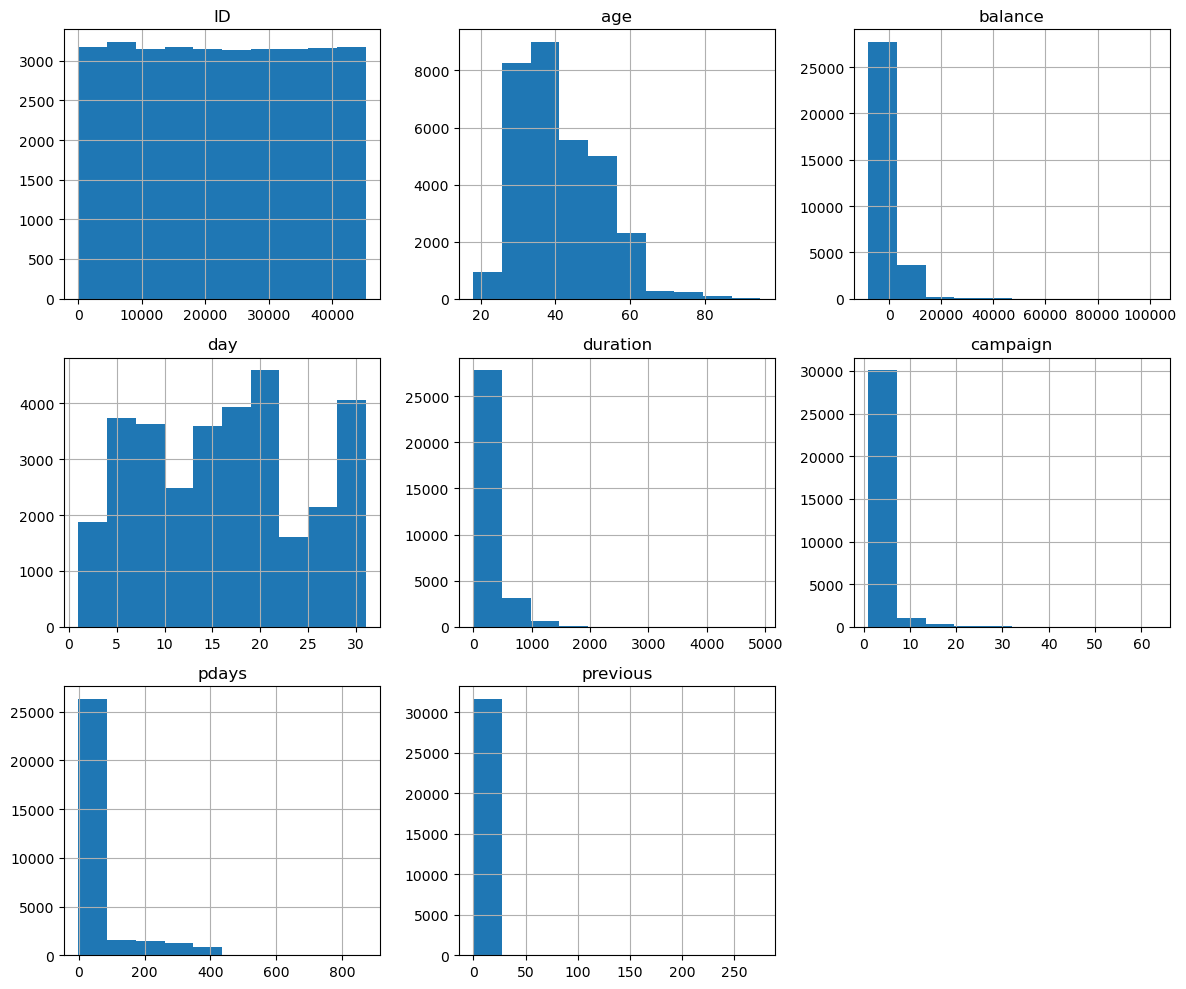

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for numeric variables
train_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [28]:
# Count the frequency of each category in categorical variables
print("Value Counts for Categorical Variables:")
for column in train_data.select_dtypes(include=['object']):
    print(train_data[column].value_counts())


Value Counts for Categorical Variables:
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
yes    17584
no     14063
Name: housing, dtype: int64
no     26516
yes     5131
Name: loan, dtype: int64
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64
unknown    25929
failure     3362
other       1288
success     1068
Na

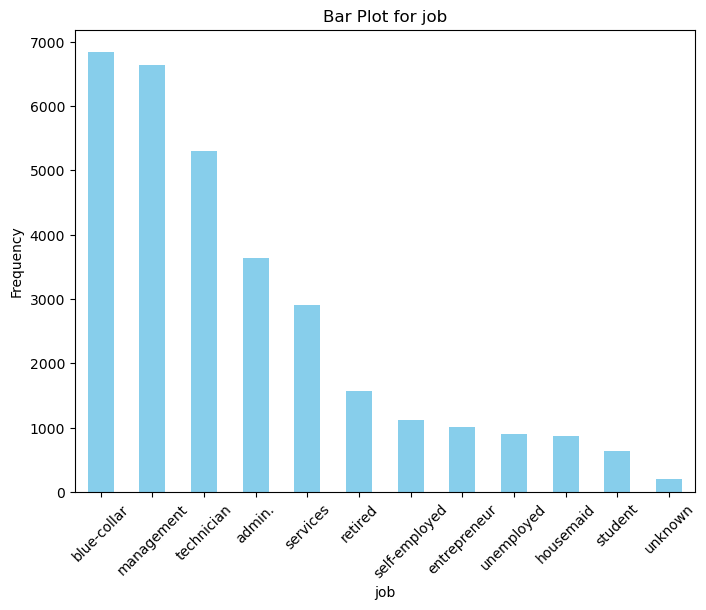

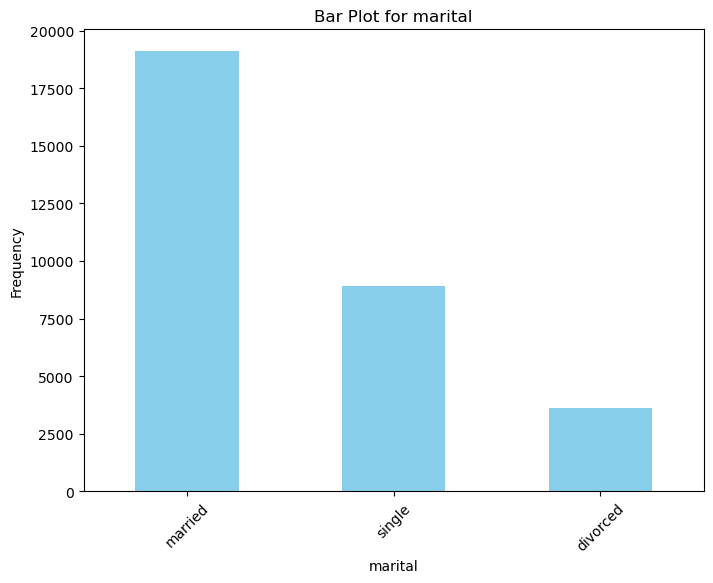

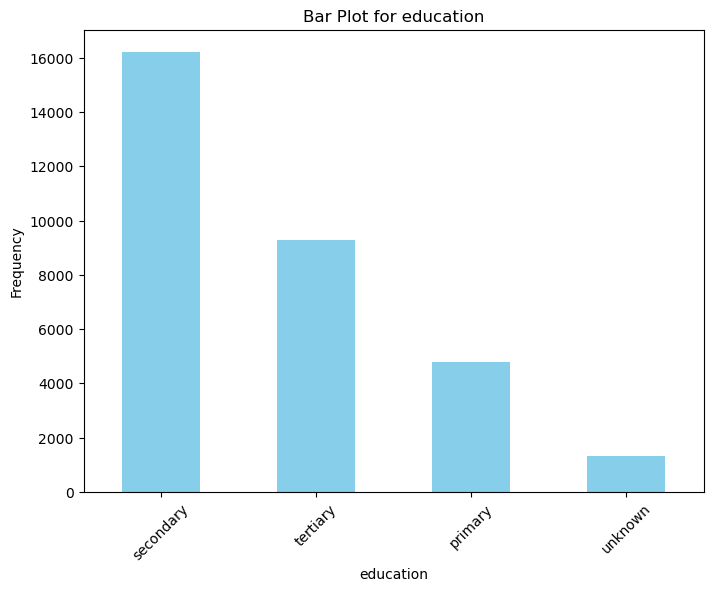

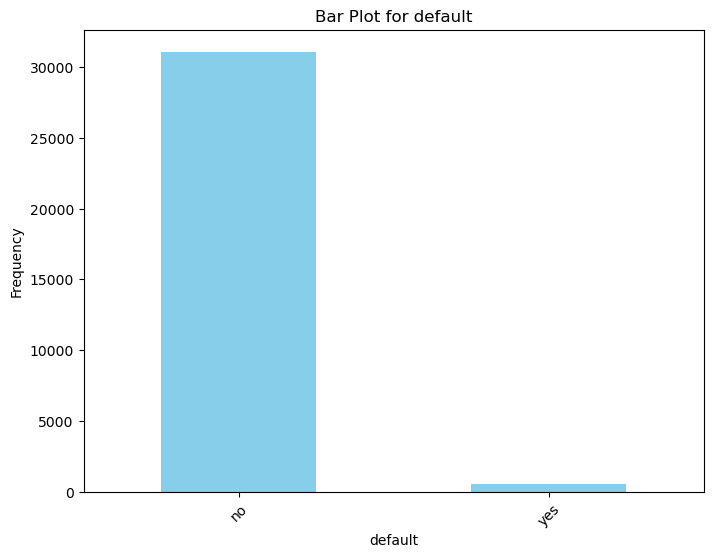

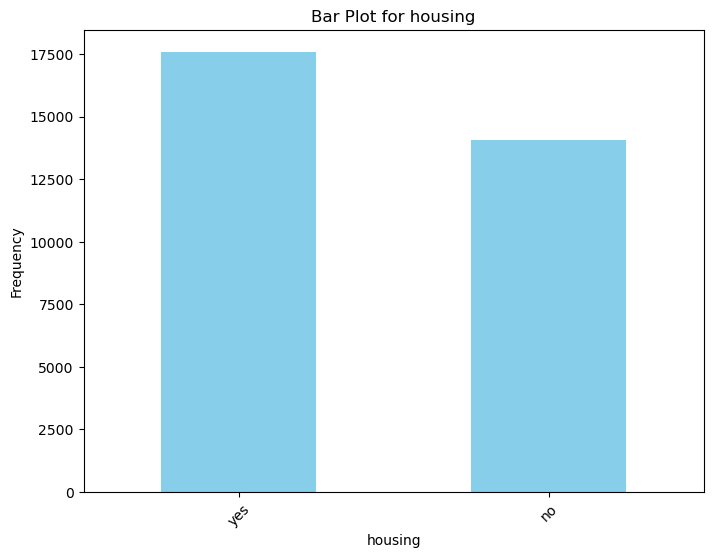

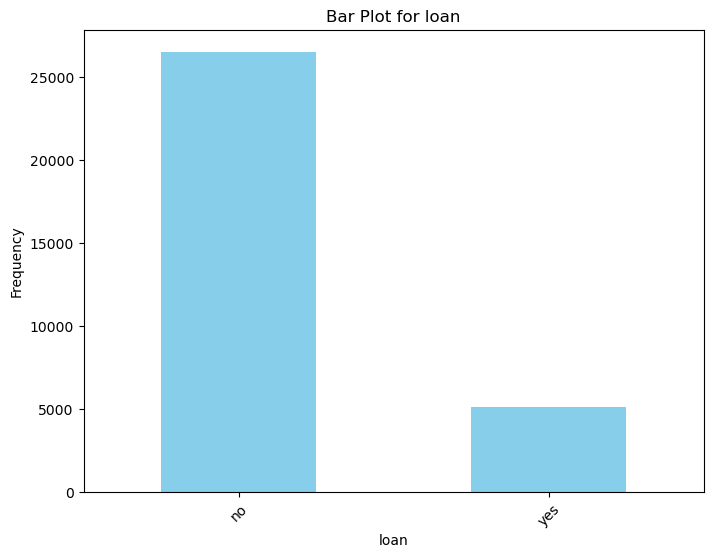

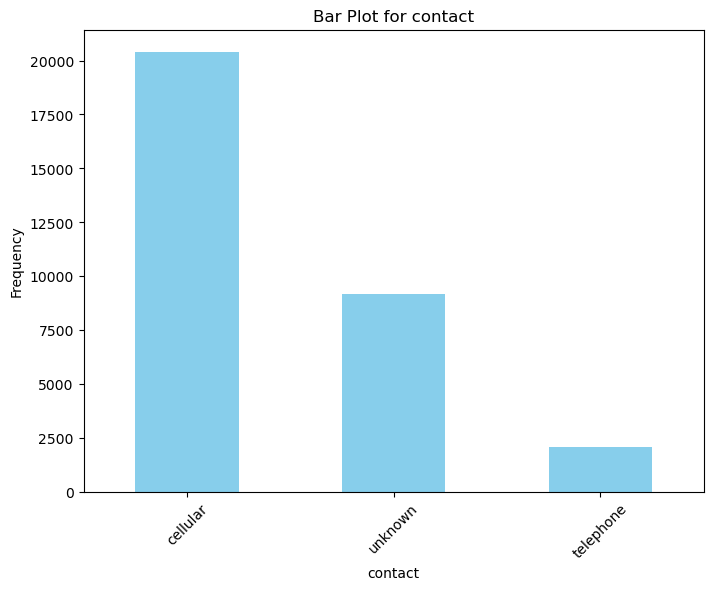

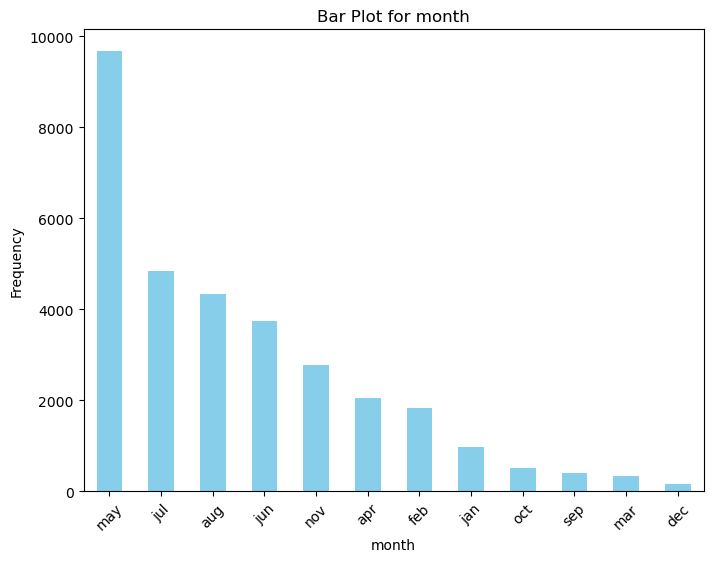

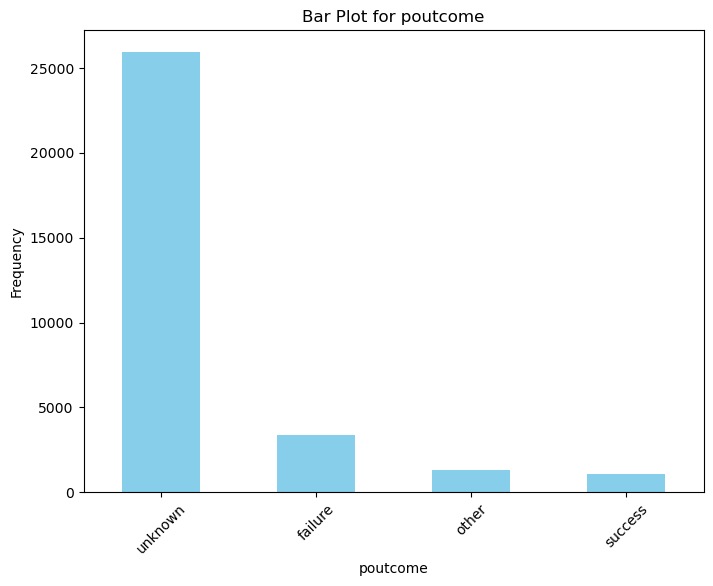

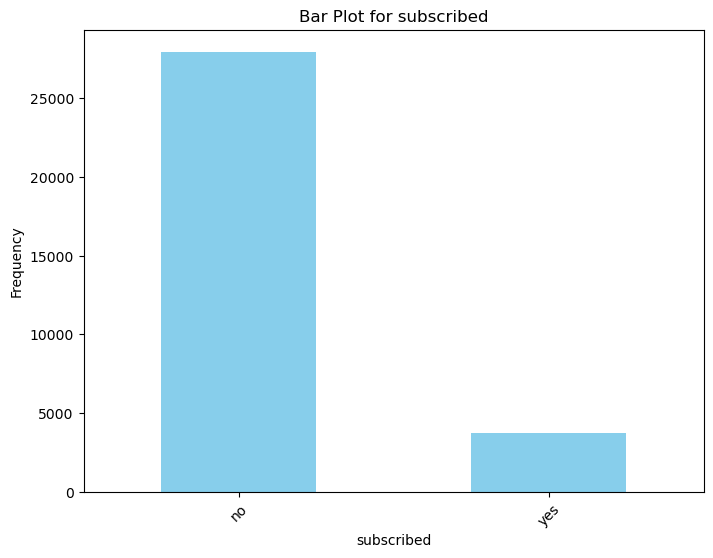

In [30]:
# Plot bar plots for categorical variables
for column in train_data.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 6))
    train_data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Bar Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


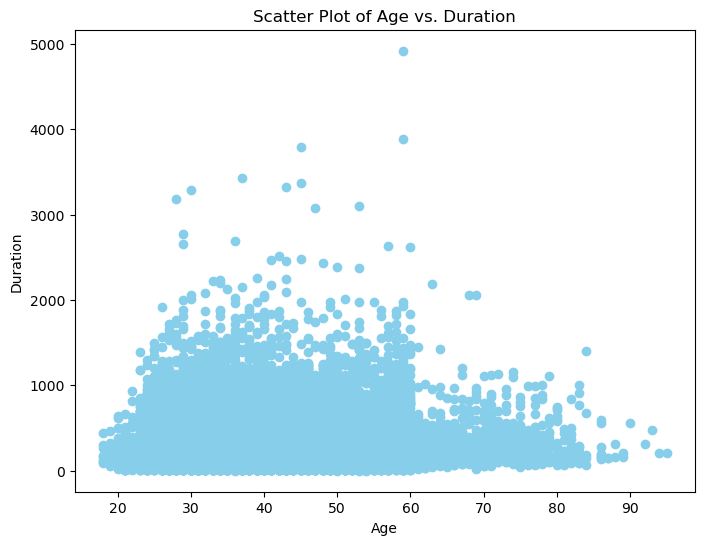

In [32]:
# Scatter plot for two continuous variables
plt.figure(figsize=(8, 6))
plt.scatter(train_data['age'], train_data['duration'], color='skyblue')
plt.title("Scatter Plot of Age vs. Duration")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()


In [ ]:
Box Plot:

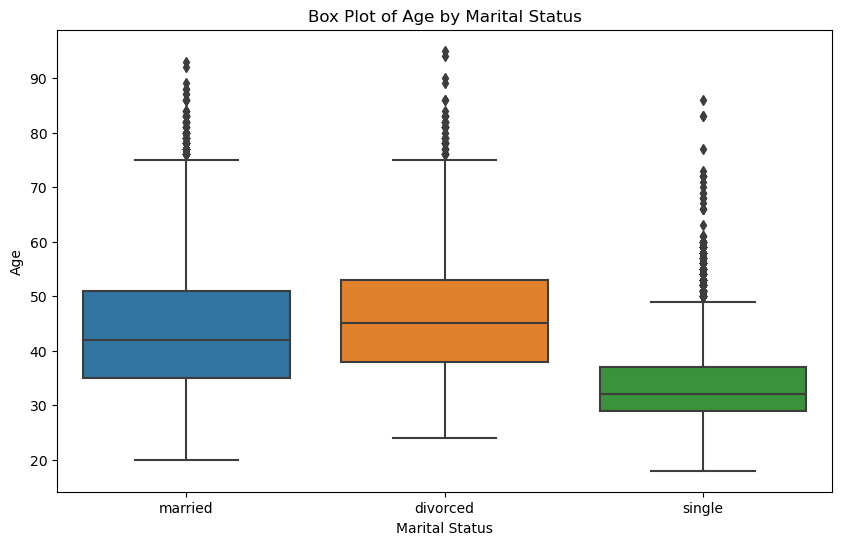

In [33]:
import seaborn as sns

# Box plot for a continuous variable vs. a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=train_data)
plt.title("Box Plot of Age by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Age")
plt.show()


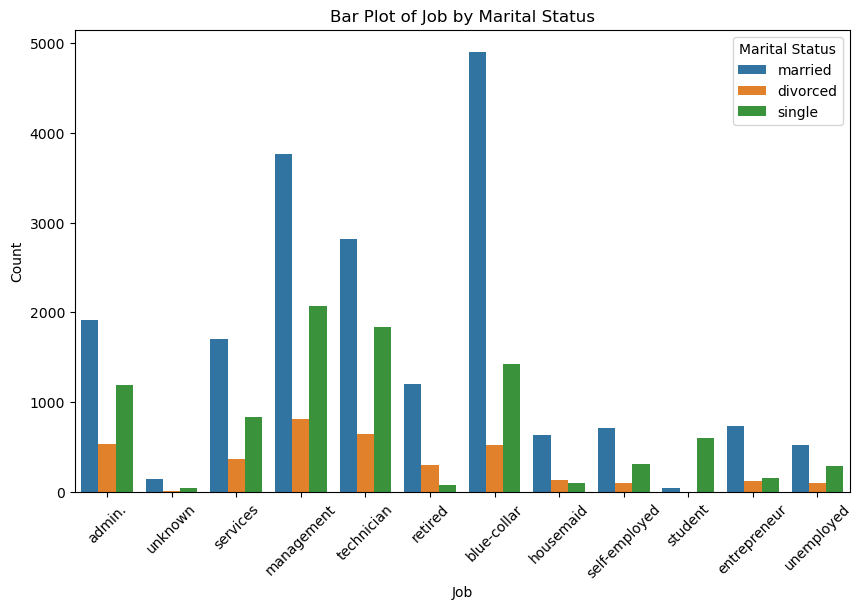

In [34]:
# Bar plot for two categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='marital', data=train_data)
plt.title("Bar Plot of Job by Marital Status")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Marital Status")
plt.show()


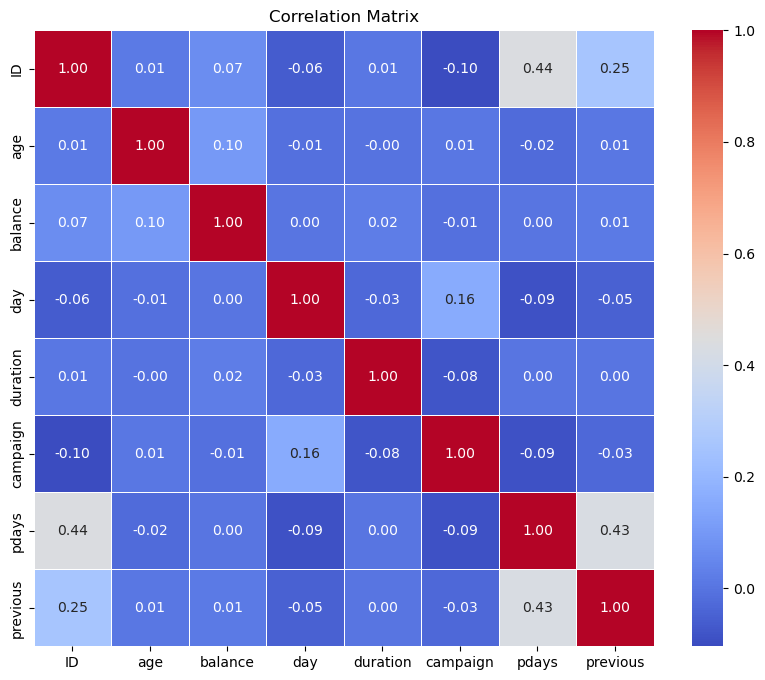

In [35]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [36]:
# Cross-tabulation of two categorical variables
cross_tab = pd.crosstab(train_data['education'], train_data['loan'])
print("Cross-tabulation of Education and Loan:")
print(cross_tab)


Cross-tabulation of Education and Loan:
loan          no   yes
education             
primary     4087   721
secondary  13187  3037
tertiary    8029  1272
unknown     1213   101


In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url_train = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv"
data = pd.read_csv(url_train)

# Displaying the first few rows of the dataset
print(data.head())


      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

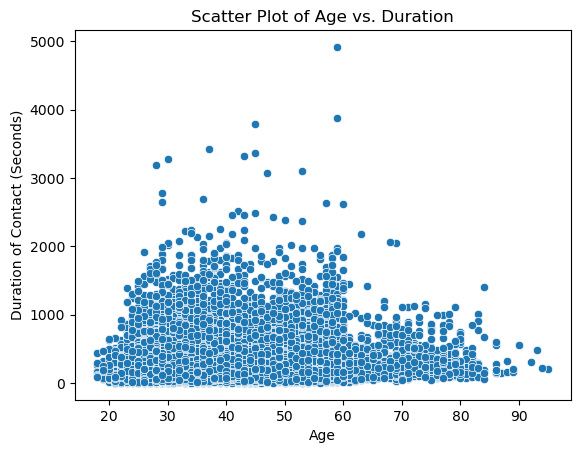

In [5]:
sns.scatterplot(x='age', y='duration', data=data)
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration of Contact (Seconds)')
plt.show()

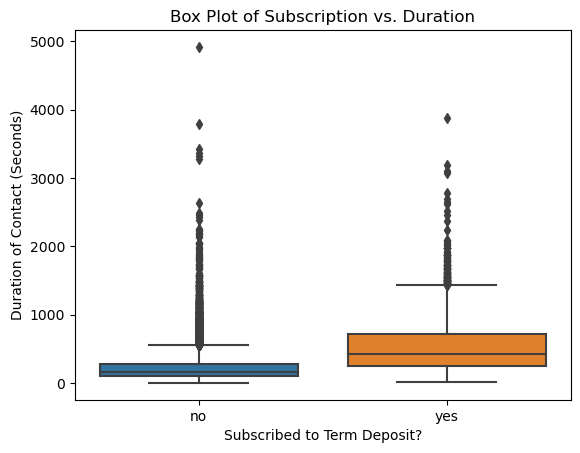

In [6]:
sns.boxplot(x='subscribed', y='duration', data=data)
plt.title('Box Plot of Subscription vs. Duration')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Duration of Contact (Seconds)')
plt.show()

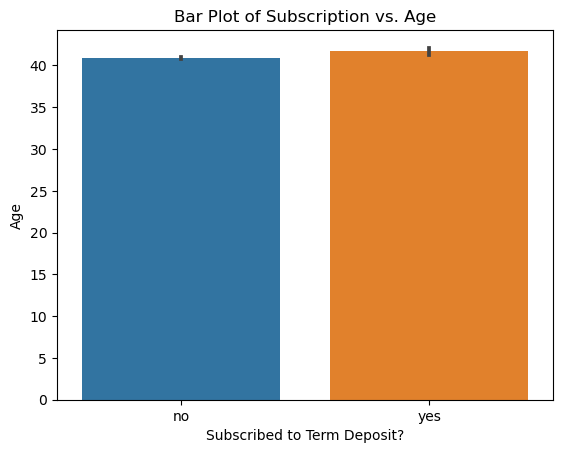

In [9]:
sns.barplot(x='subscribed', y='age', data=data)
plt.title('Bar Plot of Subscription vs. Age')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Age')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12036\3718659487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


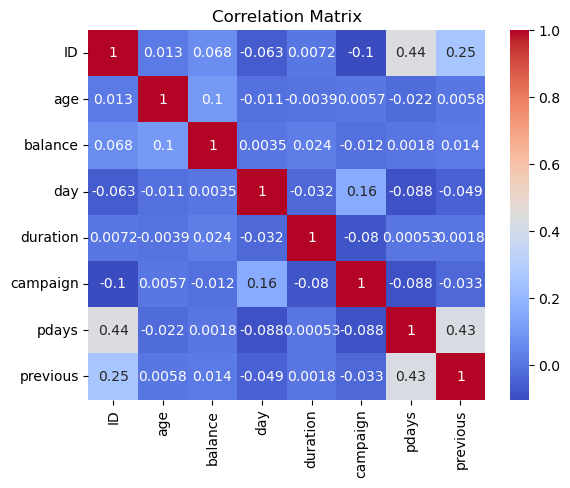

In [8]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Load the dataset
url_train = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv"
data = pd.read_csv(url_train)

# Check the columns in the dataset
print(data.columns)


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [13]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url_train = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv"
data = pd.read_csv(url_train)

# Data preprocessing
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Separate features (X) and target variable (y)
X = data.drop(columns=['ID', 'subscribed'])
y = data['subscribed']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building - Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.9067930489731437

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      5599
         yes       0.65      0.42      0.51       731

    accuracy                           0.91      6330
   macro avg       0.79      0.69      0.73      6330
weighted avg       0.90      0.91      0.90      6330



In [14]:
import joblib

# Save the model to disk
joblib.dump(rf_classifier, 'term_deposit_model.pkl')


['term_deposit_model.pkl']